#### Genetic algorithm example ####

In [5]:
%pylab inline
import ga as ga
import numpy as np

Populating the interactive namespace from numpy and matplotlib


Genetic algorithm will estimate distance from [x, y] = [20, 70] in each generation to estimate that point.
ga.minimizedist() function provided in ga.py

Here is how it looks:

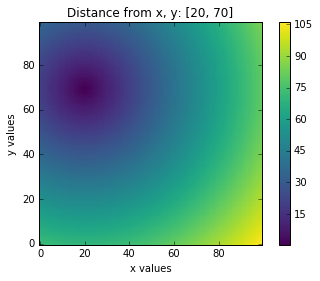

In [14]:
x = np.linspace(0,100,100)
y = np.linspace(0,100,100)

XX, YY = meshgrid(x, y)
surface = ga.minimizedist((XX,YY))
imshow(surface, interpolation='nearest', origin='lower')
xlabel('x values')
ylabel('y values')
viridis()
colorbar()
title('Distance from x, y: [20, 70]')
savefig('1-distancetotarget.png')

In [23]:
func=ga.minimizedist
# number of indivual per generation
N=100
# tolerance value to satisfy
tolerance=0.05

# initialize population
pop = ga.initpopulation(N)
# rate fitness of each individual
perf = ga.fitness(func, pop)

#keeping all individuals in each generation
#and their fitness for further analysis
pops = {}
perfs = {}
idx = 0

tol = np.min(perf)
while tol > tolerance:
    pops[idx] = pop
    perfs[idx] = perf
    idx = idx+1
    
    # get next generation
    pop = ga.children(pop, perf)
    # rate their performances
    perf = ga.fitness(func, pop)
    # keep until tolerance reached
    tol = np.min(perf)
    print 'Distance: ', tol, ' x, y: ', pop[np.where(perf==np.min(perf))[0]]
    
print 'Winner individual: x, y: ', pop[np.where(perf==np.min(perf))[0]]
print 'With ', tol, ' distance from x, y: [20, 70]'

Distance:  3.11961042727  x, y:  [[ 22.01442765  67.61797346]]
Distance:  3.11961042727  x, y:  [[ 22.01442765  67.61797346]]
Distance:  3.11961042727  x, y:  [[ 22.01442765  67.61797346]]
Distance:  3.11961042727  x, y:  [[ 22.01442765  67.61797346]]
Distance:  2.02024995245  x, y:  [[ 22.01442765  70.1532681 ]]
Distance:  1.95481335729  x, y:  [[ 20.64099652  68.1532681 ]]
Distance:  1.94170406326  x, y:  [[ 20.59982982  68.15326806]]
Distance:  0.608150497215  x, y:  [[ 20.59984037  70.1001926 ]]
Distance:  0.608150497215  x, y:  [[ 20.59984037  70.1001926 ]]
Distance:  0.608150497215  x, y:  [[ 20.59984037  70.1001926 ]]
Distance:  0.608150497215  x, y:  [[ 20.59984037  70.1001926 ]]
Distance:  0.608150497215  x, y:  [[ 20.59984037  70.1001926 ]]
Distance:  0.608150497215  x, y:  [[ 20.59984037  70.1001926 ]]
Distance:  0.608150497215  x, y:  [[ 20.59984037  70.1001926 ]]
Distance:  0.608150497215  x, y:  [[ 20.59984037  70.1001926 ]]
Distance:  0.608150497215  x, y:  [[ 20.5998403

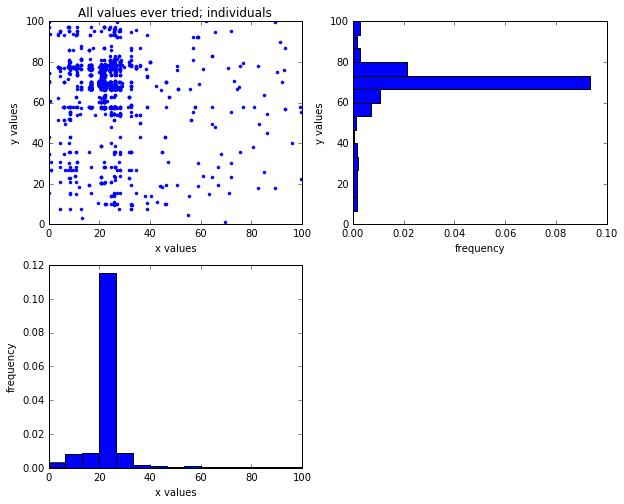

In [24]:
import pandas as pd
popsdata = pd.Series(pops)
perfsdata = pd.Series(perfs)
populations = popsdata.values
performance = perfsdata.values
individualslist = np.zeros((len(populations)*len(populations[0]),2))
performanceslist = np.zeros((len(populations)*len(populations[0])))
bestperfs = np.zeros(len(populations))
for i in range(len(populations)):
    individualslist[i*N:(i+1)*N,:]= populations[i]
    performanceslist[i*N:(i+1)*N] = performance[i]
    bestperfs[i] = min(performance[i])

figure(figsize=[10,8])
subplot(221)
plot(individualslist[:,0], individualslist[:,1], 'b.')
xlim(0,100)
ylim(0,100)
xlabel('x values')
ylabel('y values')
title('All values ever tried; individuals')

subplot(222)
hist(individualslist[:,1], bins=15, range=(0,100), normed=True, orientation='horizontal')
ylabel('y values')
xlabel('frequency')

subplot(223)
hist(individualslist[:,0], bins=15, range=(0,100), normed=True)
xlabel('x values')
ylabel('frequency')

savefig('2-allindividuals.png')

#### Notice the histograms? ####
Each generation performs better and search becomes closer to the targeted point x, y: [20, 70].

In the next figure, there is the initial population (blue) and last population (red). Last generation is not as widely scattered as the randomly distributed initial population.

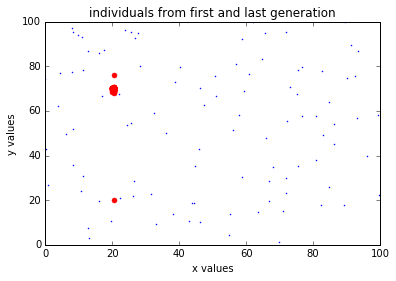

In [26]:
plot(individualslist[:N,0], individualslist[:N,1], 'b.', ms=2)
plot(individualslist[-N:,0], individualslist[-N:,1], 'r.', ms=10)
xlim(0,100)
ylim(0,100)
xlabel('x values')
ylabel('y values')
title('individuals from first and last generation')
savefig('3-firstandlastgenerations.png')

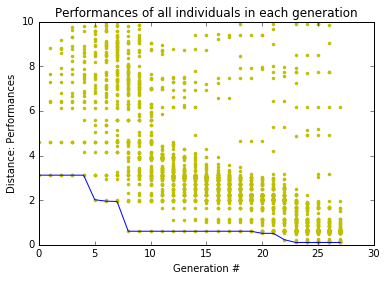

In [40]:
for i in xrange(len(performance)):
    plot(np.ones(len(performance[i]))*i, performance[i], 'y.')
plot(bestperfs)
ylim(0, 10)
xlabel('Generation #')
ylabel('Distance: Performances')
title('Performances of all individuals in each generation')
savefig('4-performances.png')